In [42]:
import json as js
import gensim as gn
import nltk
from nltk.corpus import machado, mac_morpho
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import string
from collections import defaultdict
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw')
import enchant
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /Users/pedro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /Users/pedro/nltk_data...
[nltk_data]   Package omw is already up-to-date!


In [2]:
with open('piadas.json', 'r') as f:
    piadas = js.load(f)
    
with open("piadas2.json","r") as f:
    piadas2 = js.load(f)

Nesse exercicio vamos usar somente o piadas.json, o outro arquivo irei adicionar no projeto final

vamos juntar o titulo da piada com o corpo dela para que ela possa ter sentido e tokenizar cada um dos textos

In [4]:
piadas1_textos = [piadas[j]["title"]+", "+piadas[j]["body"] for j in range(len(piadas))]

In [7]:
tok_piadas = [WordPunctTokenizer().tokenize(t.lower()) for t in piadas1_textos]

In [11]:
swu = stopwords.words('english') + list (string.punctuation)

In [12]:
stemmer = EnglishStemmer()

ex1: vamos limpar as piadas agora com e sem o stemmer e montar os indices para cada uma das limpesas 

In [82]:
piadas1_limpas = []
for piada in piadas1_textos:
    tlimpo = [stemmer.stem(token.lower()) for token in WordPunctTokenizer().tokenize(piada) if token.lower() not in swu]
    piadas1_limpas.append(tlimpo)

piadas1_limpas_sem_stemmer = []
for piada in piadas1_textos:
    tlimpo_ss = [token.lower() for token in WordPunctTokenizer().tokenize(piada) if token.lower() not in swu]
    piadas1_limpas_sem_stemmer.append(tlimpo_ss)

In [83]:
indice_com_stemmer = defaultdict(lambda:set())
for n,t in enumerate(piadas1_limpas):
    for termo in t:
        indice_com_stemmer[termo].add(n)
        
indice_sem_stemmer = defaultdict(lambda:set())
for n,t in enumerate(piadas1_limpas_sem_stemmer):
    for termo in t:
        indice_sem_stemmer[termo].add(n)

In [118]:
len(indice_com_stemmer["car"])

4901

In [119]:
len(indice_sem_stemmer["car"])

4580

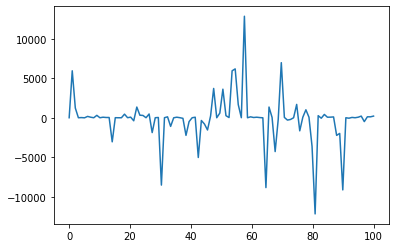

In [123]:
com = []
sem = []
palavras = []
x = np.linspace(0,100,100)
while len(com) < 100:
    try:
        termo = tok_piadas[np.random.randint(300)][np.random.randint(20)]
        if termo not in swu:
            com.append(len(indice_com_stemmer[termo]))
            sem.append(len(indice_sem_stemmer[termo]))
            palavras.append(termo)
    except:
        pass 
com = np.array(com)
sem = np.array(sem)
plt.plot(x,com-sem)
plt.show()

o grafico de cima mostra como algumas palavras como os dois indices podem devolver uma quatidade diferente de documentos

ex 2: grupos de equivalencia

usaremos sinonimos de "work" como os membros de sua classe de equivalencia

In [139]:
sinonimos = []
for syn in wordnet.synsets("kid"):
        for l in syn.lemmas():
            sinonimos.append(l.name())

print(set(sinonimos))

{'banter', 'nestling', 'minor', 'kidskin', 'Kyd', 'tike', 'Thomas_Kid', 'Kid', 'small_fry', 'pull_the_leg_of', 'youngster', 'fry', 'shaver', 'josh', 'Thomas_Kyd', 'kid', 'chaff', 'tyke', 'jolly', 'tiddler', 'nipper', 'child'}


In [163]:
def equivalentes(p):   
    precisao = []
    docs = indice_com_stemmer[p]
    quantidade = len(docs)
    indice_com_stemmer[p]
    for palavra in sinonimos:
        n = len(docs.intersection(palavra))
        precisao.append(n/quantidade)
    plt.plot(np.linspace(0,len(sinonimos),len(sinonimos)),precisao)

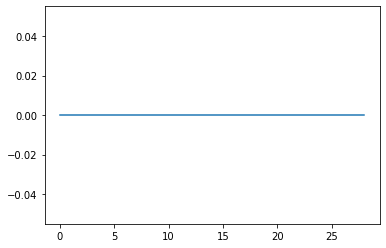

In [165]:
equivalentes("kid")

podemos ver que essa tecnica de classe de equivalencia gera uma pessima precisao, uma plausivel explicacão é que a maioria das palaras que sao sinonimos nao vem da mesma raiz.

ex4: consulta com correcão ortografica

In [168]:
def ex_consulta(palavra):
    d = enchant.Dict("en_US")
    if d.check(palavra):
        return indice_com_stemmer[palavra]
    else:
        sug = d.suggest(palavra)
        print(sug)
        palavra = input("sera que vc nao quis dizer uma das palavras acima?")
        if palavra in sug:
            return indice_com_stemmer[palavra]
        else:
            print("não é uma opcão")

In [172]:
ex_consulta("myn")

['my', 'myna', 'syn', 'Ayn', 'Lyn', 'Wyn', 'men', 'min', 'man', 'mun', 'mys', 'my n']
sera que vc nao quis dizer uma das palavras acima?men


{49153,
 172033,
 73732,
 98309,
 106507,
 188427,
 106509,
 24597,
 188439,
 188440,
 8218,
 172064,
 81956,
 188456,
 42,
 57386,
 73770,
 24621,
 8238,
 41006,
 57389,
 81965,
 131120,
 139307,
 163883,
 122936,
 8253,
 180285,
 65600,
 139328,
 163904,
 188483,
 172102,
 32839,
 8267,
 163916,
 155726,
 24656,
 188497,
 82002,
 90195,
 180307,
 87,
 139352,
 155740,
 65630,
 8297,
 65642,
 8302,
 111,
 172144,
 73841,
 49266,
 147573,
 123001,
 114810,
 131196,
 180348,
 188543,
 65664,
 65667,
 90244,
 90253,
 57491,
 172179,
 172181,
 106646,
 180376,
 147611,
 180380,
 188572,
 82079,
 123039,
 172191,
 106665,
 170,
 172203,
 49324,
 65709,
 16558,
 147636,
 155829,
 180407,
 49348,
 90309,
 188615,
 41160,
 73929,
 65738,
 49355,
 41164,
 106700,
 147661,
 106708,
 32981,
 24790,
 123092,
 16600,
 16601,
 147673,
 24795,
 16604,
 57564,
 106716,
 172251,
 224,
 82145,
 155875,
 180453,
 24806,
 65767,
 147687,
 180456,
 155882,
 180457,
 73964,
 82157,
 90355,
 16632,
 131321,

ex 5 e 6: consulta por frases e caso nao encontre a frase interia

In [175]:
def indice_posicional(tok):
    d = defaultdict(lambda:[])
    for tid, a in enumerate(tok):
        for t in set(a):
            d[t].append([tid] + [ind for ind, ele in enumerate(a) if ele == t])
    return d      

In [176]:
indicep = indice_posicional(tok_piadas)

In [292]:
def consulta(frase):
    palavras = frase.split()
    indices = [indicep[palavra] for palavra in palavras]
    ans = []
    for n,palavra1 in enumerate(palavras):
        ansa = set()
        for m,palavra2 in enumerate(palavras):
            if m == n:
                continue
            for ele in indices[n]:
                for elem in indices[m]:
                    if ele[0] == elem[0]:
                        for pos1 in ele[1:]:
                            for pos2 in elem[1:]:
                                if pos1 - pos2 == n - m:
                                    ansa.add(ele[0])
        ans.append(ansa)
    ans = tuple(ans)
    out = ans[0].intersection(*ans)
    if len(out) == 0:
        return ans[0]
    
    return out
            
# muito muito muito pouca otimizade, extremamente redundante, mas demorei mt pra fazer....dps eu melhoro ela

In [294]:
consulta("welcome to india")

{20}

In [295]:
piadas1_textos[20]

'A monkey is getting stoned in a zoo..., Welcome to India'